WHAT ALL QUESTIONS CAN BE ANSWERED BASED ON THE FIRST OBSERVATION OF THE DIFFERENT COLUMNS OF THE PROVIDED DATA

1. Who were the passengers on the Titanic? (age, gender, class.. etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?
5. What factors helped someone survive the sinking?
6. What is the probability that someone aboard the Titanic would survive given their class, sex, age etc.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the training data into a data frame
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Getting basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# from the information we can infer that we are missing a lot of cain data and some age data

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can straight away see that about 38% of the people survived from the mean of the column survived

Who were the passengers on the Titanic? (age, gender, class.. etc)

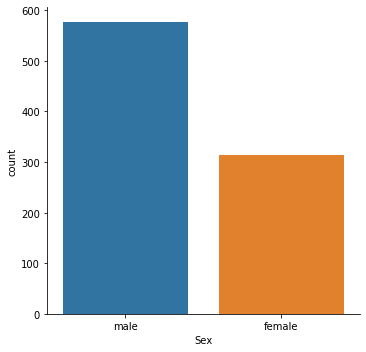

In [7]:
sns.catplot(x = 'Sex', data = train_data, kind = 'count')

we have plotted a factor plot and discovered that a majority of the people aboard the titanic were male.

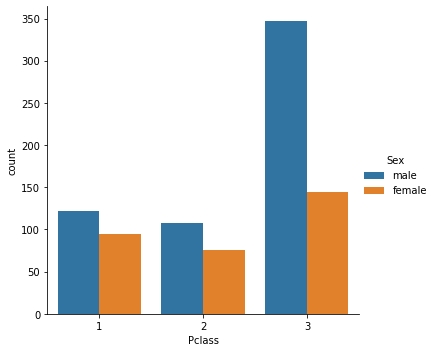

In [8]:
sns.catplot(x = 'Pclass', hue = 'Sex', data = train_data, kind = 'count')

To take this analysis further we can introduce another column to the data base which helps us distinguish between adults and children, more specifically males, females and children

In [9]:
#Making a python function which returns the appropriate value

def classify(pas):
    age = pas['Age']
    sex = pas['Sex']
    if age<16:
        return 'child'
    else:
        return sex

Learning how to access individual rows of a DataFrame and then applying a function to it using vectorization and broadcasting. 

We make use of the apply attribute of the pandas library with the created dataframe. 

Also we need to specify axis = 1 because we are computing in a direction which is perpendicular to the direction of computation of means i.e. if we want ot access all the records one by one we need to use axis = 1.

In [10]:
train_data['Person'] = train_data.apply(classify, axis = 1)

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We can see a new column has been added to the dataset which shows whether the passenger is a male, female or a child.

Now we find the number of people of each kind and then we plot the different types of people in different classes

In [12]:
print(train_data['Person'].value_counts())

male      537
female    271
child      83
Name: Person, dtype: int64


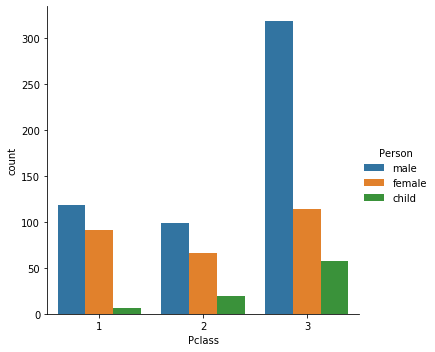

In [13]:
sns.catplot(data = train_data, x = 'Pclass', hue = 'Person', kind = 'count')

It is interesting to note the drastically different male to female and child ratio in the class 3 compares to the classes 1 and 2

Now we analyse the age trends for differnt classes using 
1. an overall histogram 
2. a facet grid for depicting age spread of different classes
3. a facet grid for depicting age spread for the 2 genders

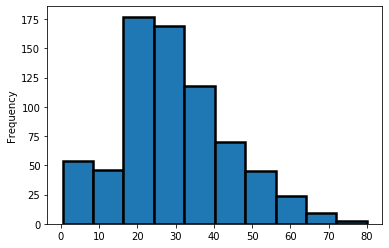

In [14]:
train_data['Age'].plot.hist(bins = 10, edgecolor = 'black', linewidth = 2.5)

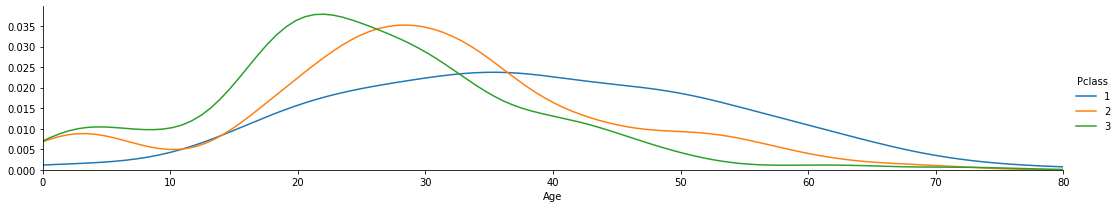

In [15]:
plot = sns.FacetGrid(data = train_data, hue = 'Pclass', aspect = 5)
#note that aspect is basically the width to height aspect ratio. it adjusts the graph accordingly.
#we assign the axis to a variable because we need to use the axis in the next line to plot a kde graph for th e age varibale
plot.map(sns.kdeplot,'Age')
#removing the unnecessary part of the x axis by finding the age of the oldest person and cutting the axis
oldest_person = train_data['Age'].max()
plot.set(xlim = (0, oldest_person))
#adding a legend to show what color is depicting which class
plot.add_legend()

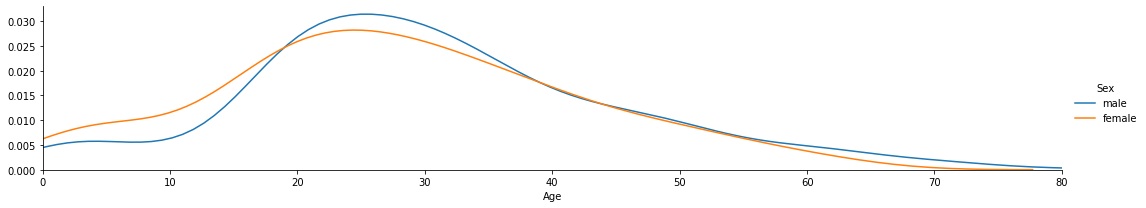

In [16]:
plot = sns.FacetGrid(data = train_data, hue = "Sex", aspect = 5)
plot.map(sns.kdeplot, 'Age')
oldest_person = train_data['Age'].max()
plot.set(xlim = (0, oldest_person))
plot.add_legend()

From the plots we can see that the age distribution between males and females is almost identical.
Also, it is clear that a lot more younger people belonged to the 3rd class compared to classes 1 and 2

Now we will analyse the cabin data for which the cabin column was NaN. If we proceed by removing all the na rows we are left with 183 rows i.e. we have 183 complete rows for which all the data is available

But according to the stats available to us we know that we have 204 non null cabin values so we can have a more accurate analysius if we just eliminate the rows that have a NaN in cabin column regardless of the rest of the information.

In [17]:
train_data_deck = train_data.dropna()

In [18]:
train_data_deck.count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
Person         183
dtype: int64

In [19]:
# using this we will obtain the 204 rows with cabin details.
train_data_deck_2 = train_data[train_data.Cabin.notna()]

In [20]:
train_data_deck_2.count()

PassengerId    204
Survived       204
Pclass         204
Name           204
Sex            204
Age            185
SibSp          204
Parch          204
Ticket         204
Fare           204
Cabin          204
Embarked       202
Person         204
dtype: int64

In [21]:
#defining a function to get the first alphabet out of the cabin number and then using broadcasting to add a new column to the df
def passenger_level(pas):
    cabin = pas['Cabin']
    return cabin[0]
train_data_deck['Level'] = train_data_deck.apply(passenger_level, axis = 1)
train_data_deck_2['Level'] = train_data_deck_2.apply(passenger_level, axis=1)

C:\Users\paran\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\paran\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#we are going to get a copy of slice error in this case
#the reason we are getting this error is because python thinks we might have wanted to make the changes we just made to the original dataset as well and not just the sub dataset we created

In [22]:
train_data_deck_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


In [23]:
type(train_data_deck_2)

pandas.core.frame.DataFrame

In [24]:
train_data_deck_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     202 non-null    object 
 12  Person       204 non-null    object 
 13  Level        204 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 23.9+ KB


In [25]:
train_data_deck_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,185.000000,204.000000,204.000000,204.000000
mean,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
std,251.379279,0.472564,0.525961,15.679356,0.628918,0.729976,74.391749
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,261.750000,0.000000,1.000000,24.000000,0.000000,0.000000,29.453125
50%,457.500000,1.000000,1.000000,36.000000,0.000000,0.000000,55.220850
75%,684.000000,1.000000,1.000000,48.000000,1.000000,1.000000,89.328150
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


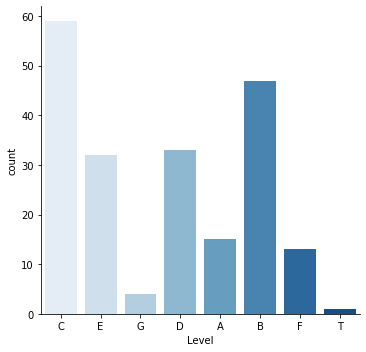

In [26]:
sns.catplot('Level', data = train_data_deck_2, kind = 'count', aspect = 1, palette = 'Blues')

Now we have the graph for distribution of different number of people on different decks.
It would be interesting to see how the people of different classes are allot different floors and what is the male to female to child ratio for the same scenario

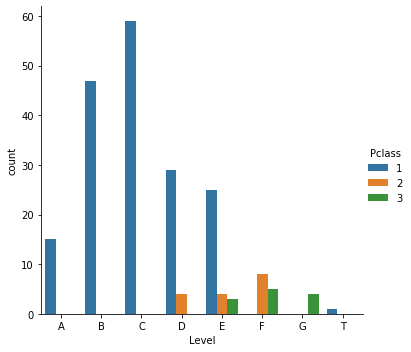

In [27]:
sns.catplot('Level', data = train_data_deck_2, kind = 'count', hue = 'Pclass', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

It is easy to observe that the top 3 decks were only alloted to the people with 1st class tickets. But it should be noted that we only have limited cabin number data

Now we add another factor in this and find out how the men women and children were distributed among different levels

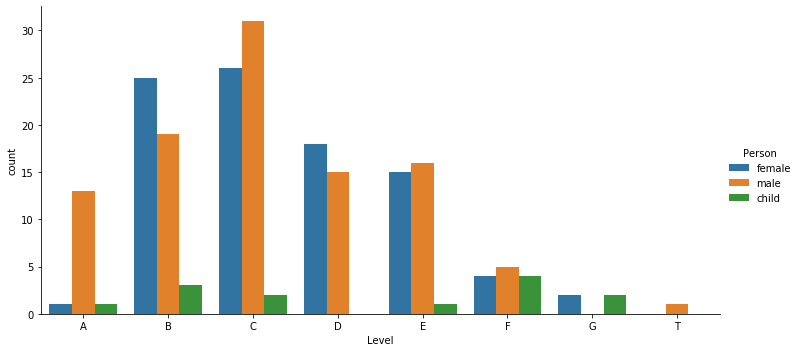

In [28]:
sns.catplot('Level', data = train_data_deck_2, kind = 'count', hue = 'Person', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], aspect = 2)

Now we go back to the original dataset and see how many people got on at each of the boarding points

C -> Cherbourg
Q -> Queenstown
S -> Southampton

We will also how many people were alone and how many were travelling with family

In [29]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Observing the original data we can see the columns for 'Embarked' column, the 'SibSp' columns which tell us where a passenger boarded the titanic and whether or not they were with a sibbling or their spouce and finally the 'Parch column tells us the number of parents or children someone had on the ship.'

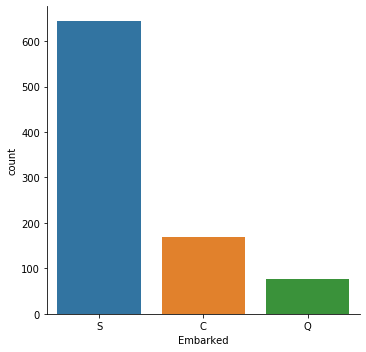

In [30]:
sns.catplot('Embarked', data = train_data, kind = 'count')

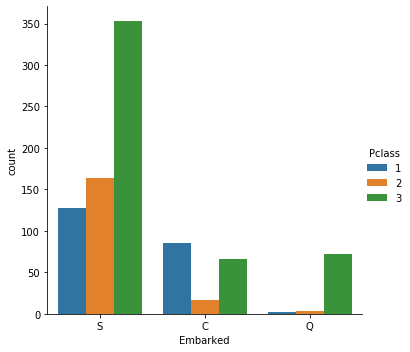

In [31]:
#now let us differentiate on the basis of class

sns.catplot('Embarked', data = train_data, kind = 'count', hue = 'Pclass')

It is really interesting to see that very few first and second class passengers boarded the titanic from queensland and cherbourg so they must have been economically weaker 

In [32]:
# making a function which will tell us if a person was alone or with some family
def WasAlone(pas):
    if pas['SibSp'] + pas['Parch'] > 0:
        return 'No'
    if pas['SibSp'] + pas['Parch'] == 0:
        return 'Yes'

In [33]:
train_data['Alone'] = train_data.apply(WasAlone, axis = 1)

In [34]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Yes
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,No
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,No


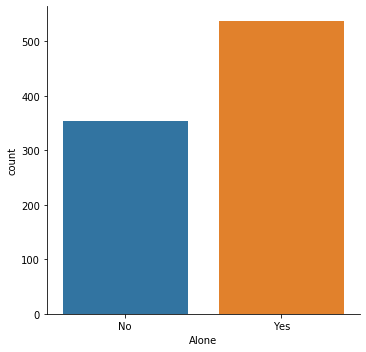

In [35]:
sns.catplot('Alone', data = train_data, kind = 'count')

So quite a few people aboard the titanic were not alone.

Now plotting to see what factors influenced the survival of a person

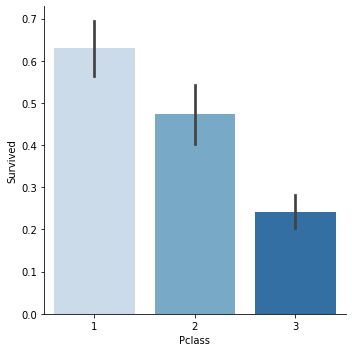

In [36]:
sns.catplot(x = 'Pclass', y = 'Survived', data = train_data, kind = 'bar', palette = 'Blues')

So we can see that the survival probability was much higher for a first class passenger compareds to the second and third class passenger

Now we add see if it increases your odds of survival if you are a woman or a child compared to men

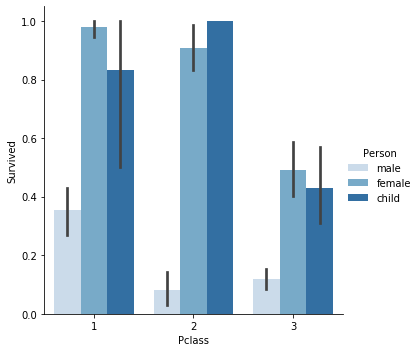

In [37]:
sns.catplot(x = 'Pclass', y = 'Survived', data = train_data, hue = 'Person', kind = 'bar', palette = 'Blues')

As expected the chance of survival is a lot more for women and children

Now we will see if age is a factor and then we will see if having a family is a factor

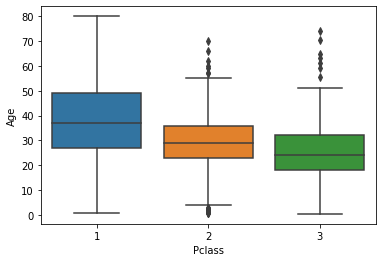

In [38]:
sns.boxplot(data = train_data, x = "Pclass", y = "Age")

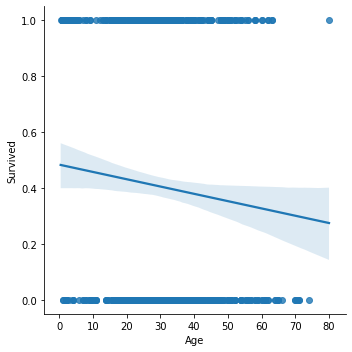

In [39]:
sns.lmplot(x = 'Age', y = 'Survived', data = train_data)
#we have used lm plot instead of regplot because we want to plot a regression plot over a facet grid for more clarity

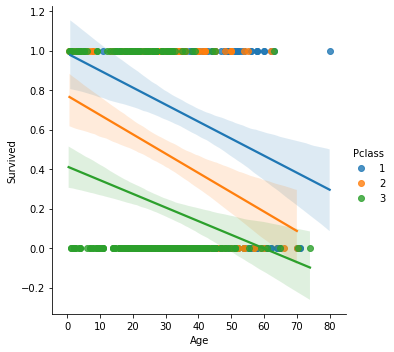

In [40]:
sns.lmplot(x = 'Age', y = 'Survived', data = train_data, hue = 'Pclass')

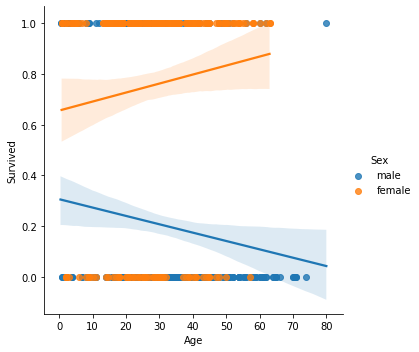

In [41]:
# from the above 2 graphs it is clear that the chances of survival are lesser as the age goes up

sns.lmplot(x = 'Age', y = 'Survived', data = train_data, hue = 'Sex')

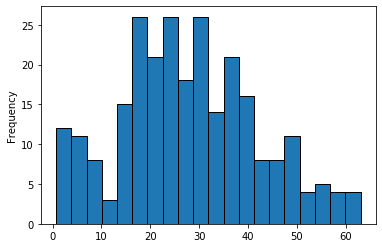

In [42]:
#This graph is rather peculiar because it contradicts our previous conclusion. But this is most probably a statistical anomaly.
# according to me there is a good chance that there are very few older women. lets find out

#making a sub data frame with only female members
train_data_3 = train_data[train_data.Sex == 'female']
train_data_3.head(20)

#now we plot an age histogram
train_data_3['Age'].plot.hist(bins = 20, edgecolor = 'Black')


as suspected there are very few women over the age of 40 so it is possible that we get a high survival rate even if few of them survived

Now lets see if having a family is a factor

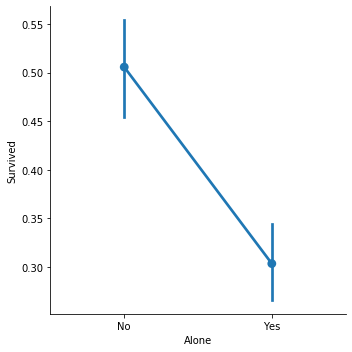

In [43]:
sns.catplot(data = train_data, x = 'Alone', y = 'Survived', kind = 'point')

It is clear that the survival rate is a lot higher if the person was travelling with some family member

NOW WE WILL BE DOING THE PREDICTIVE ANALYSIS AND CHECKING OUR RESULTS USING THE SECOND DATASET

In [44]:
#Gettint the pivoting features in tables
#Better chance of survival due to higher class
train_data[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [45]:
#Better chance of survival due to gender
train_data[['Sex','Survived']].groupby('Sex').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [46]:
def tot_fam(pas):
    return pas['Parch'] + pas['SibSp']
train_data['Total_Family'] = train_data.apply(tot_fam, axis = 1)

In [47]:
train_data[['Total_Family','Survived']].groupby('Total_Family').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Total_Family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


------

USING LOGISTIC REGRESSION TO PREDICT IF THE PERSON SURVIVED OR NOT

-----

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Total_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes,0


We are gonna find the independent variables that influence the dependent variable and then put them in our dataframe

In [49]:
sex = pd.get_dummies(train_data['Sex'], drop_first = True)

In [50]:
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [51]:
pcl = pd.get_dummies(train_data['Pclass'], drop_first = True)

In [52]:
train_data = pd.concat([train_data, sex, embarked, pcl], axis = 1)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Total_Family,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes,0,1,0,1,0,1


In [54]:
train_data.rename(columns = {2:'c2', 3:'c3'}, inplace = True)

Therefore we have the dependent variable columns - male, Q, S, 2, 3. Now we will train the data and make predictions

In [55]:
# X includes all the columns with independent variables that we are going to use to predict our value
X = train_data[['male', 'Q', 'S', 'c2', 'c3']]
# y is the column which we want to predict
y = train_data['Survived']

In [56]:
X

,male,Q,S,c2,c3
0,1,0,1,0,1
1,0,0,0,0,0
2,0,0,1,0,1
3,0,0,1,0,0
4,1,0,1,0,1
...,...,...,...,...,...
886,1,0,1,1,0
887,0,0,1,0,0
888,0,0,1,0,1
889,1,0,0,0,0


In [57]:
#splitting the data into train and test data where test size is 20% of the data values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# One should understand the importance of random_state. it doesnt matter what number we set it to. Setting it to a 
# number ensures that the same index random numbers are selected each time to split the data. So that we dont have 
# different results each time.

In [60]:
#importing the logistic regression module, making an instance for the same and applying the instance to the training data.

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
Logistic_model = LogisticRegression()

In [63]:
Logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#making predictions for the test data

In [65]:
prediction = Logistic_model.predict(X_test)

In [66]:
#Analyzing the classification report and the confusion matrix to get the accuracy of the model.

In [67]:
from sklearn.metrics import classification_report

In [68]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82       106\n           1       0.75      0.67      0.71        73\n\n    accuracy                           0.78       179\n   macro avg       0.77      0.76      0.76       179\nweighted avg       0.77      0.78      0.77       179\n'

In [69]:
# Confusion matrix can help us understand the accuracy of our model. It consists of tp, fp, tn and fn.

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, prediction)

array([[90, 16],
       [24, 49]], dtype=int64)

In [72]:
# We can directly computer the accuracy as well.

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, prediction)

0.776536312849162

In [75]:
#Thus our model is 77.65% accurate.